# 4. Selenium을 활용한 웹크롤러 만들기

![banner](../image/4-1.jpg)

## 웹이란 무엇일까요?

> 웹은 ‘월드 와이드 웹(World Wide Web)’의 줄임말이에요. 첫 글자를 따서 WWW라고 부르기도 합니다. ‘웹(web)’을 영어 뜻 그대로 풀이하면 ‘거미줄’이라는 뜻인데, 거미줄처럼 서로 연결된 모습을 상상하면 딱 알맞는 용어겠죠?

> 웹은 뼈대를 이루는 html, 꾸며주기를 담당하는 css, 동작을 담당하는 javascript로 이루어져 있어요. 이를 실제로 살펴볼까요? Chrome 브라우져에서 오른쪽 버튼을 눌러 검사 옵션에 들어가보세요.

![banner](../image/4-4.jpg)

> 오른쪽에서 첫번째 Elements 창이 보이시나요? 보고계신 내용이 웹페이지의 뼈대를 이루는 html문서에요. 보는것 처럼 html은 태그(tag)를 활용해서 만들어졌으며 이를 어려운말로 마크업언어(Markup languate)라고 합니다. 두번째 창에 보면 웹페이지를 꾸며주는 css를 확인할수 있고 Source 탭을 누르면 웹페이지의 작동을 관리하는 javascript를 확인해볼수 있어요. 이 두개에 대해서는 파이썬의 활용편에서 자세하게 설명하도록 할께요.

![banner](../image/4-3.jpg)

## 웹크롤러란 무엇일까요?

> 웹 크롤러(web crawler)는 조직적, 자동화된 방법으로 월드 와이드 웹을 탐색하는 컴퓨터 프로그램입니다. 검색엔진의 경우는 자료의 최신화를 위해서 사용하기도 하고 주로 정보수집을 위해 활용하고 있어요.

> 정식 명칭은 'Web Scraping'이라고 하며 영어로 자료를 찾으실때는 해당 명칭을 활용하는게 좋아요. 또한 주로 Selenium이나 PhantomJS를 활용해서 크롤러를 만드는데 저희는 Seleminum을 활용해볼꺼에요

## Selenium이란 무엇일까요?

> Selenium은 보통 웹이나 앱을 테스트할 때 사용하는 프레임워크에요. 자동화 프로그램으로써 사용자가 따로 만지지 않아도 자동으로 탐색해주고 원하는 정보를 찾도록 도와줍니다. 일종의 매크로라고 생각하면 쉽겠죠? 이를 이용해서 웹페이지에 있는 내용을 자동으로 가져올꺼에요

## 네이버 부동산 크롤링 하기

![banner_example1](../image/4-2.jpg)

In [2]:
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup # BeautifulSoup 패키지를 이용하면 html문서를 쉽게 파싱할수 있어요
from pandas import DataFrame

### 한페이지 크롤링

In [3]:
# 페이지(page) 부분을 수정하여 다름 페이지로 넘어갈 수 있어요
url = 'https://land.naver.com/article/divisionInfo.nhn?rletTypeCd=A01&tradeTypeCd=B2\
&hscpTypeCd=A01%3AA03%3AA04&cortarNo=4211000000&articleOrderCode=&cpId=&minPrc=&\
maxPrc=&minWrrnt=&maxWrrnt=&minLease=&maxLease=&minSpc=&maxSpc=&subDist=&mviDate=&\
hsehCnt=&rltrId=&mnex=&siteOrderCode=&cmplYn=&page={}&location=2339#_content_list_target'.format(1)

In [4]:
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

In [5]:
import re

# 공백 문자 제거
pattern = re.compile(r'\s+')

In [6]:
col= ['거래', '종류', '확인일자', '매물명', '면적(㎡)', '층', '매물가(만원)', '연락처']

In [7]:
# row 값을 가져오기 위한 tbody값 선택
tbody = soup.select('.sale_list > tbody > tr')

In [8]:
rows = []
for i, tr in enumerate(tbody):
    if i%2 != 0:
        continue
    row = []
    for i, td in enumerate(tr.select('td')):
        if i == 3:
            if td.select('img'): 
                continue
        row.append(re.sub(pattern,'', td.text))
    rows.append(row)

In [9]:
from pandas import DataFrame

df = DataFrame.from_records(rows, columns=col)
df.tail(5)

,거래,종류,확인일자,매물명,면적(㎡),층,매물가(만원),연락처
25,월세,아파트,18.09.18.,청와네이버부동산에서보기,53/39공급면적53.9㎡전용면적39.7㎡,5/10,500/30,부동산미소공인중개사사무소033-251-5512
26,월세,아파트,18.09.17.,현대2차네이버부동산에서보기,78A/59공급면적78.18㎡전용면적59.76㎡,13/15,"3,000/45",금탑공인중개사사무소033-254-2454
27,월세,아파트,18.09.17.,춘천더샵네이버부동산에서보기,109A/84공급면적109.77㎡전용면적84.91㎡,14/25,"2,000/70",타워공인중개사사무소033-910-8838
28,월세,아파트,18.09.17.,동보네이버부동산에서보기,47/28공급면적47㎡전용면적28.38㎡,9/12,200/25,다모아공인중개사사무소033-262-5989
29,월세,아파트,18.09.17.,휴먼타운네이버부동산에서보기,112/84공급면적112.11㎡전용면적84.89㎡,15/15,"2,000/70",호랑이공인중개사033-255-4300


In [10]:
# 매물명에서 '네이버부동산에서보기' 제거
df['매물명'] = df['매물명'].apply(lambda x : x.replace('네이버부동산에서보기', ''))
df.tail(5)

,거래,종류,확인일자,매물명,면적(㎡),층,매물가(만원),연락처
25,월세,아파트,18.09.18.,청와,53/39공급면적53.9㎡전용면적39.7㎡,5/10,500/30,부동산미소공인중개사사무소033-251-5512
26,월세,아파트,18.09.17.,현대2차,78A/59공급면적78.18㎡전용면적59.76㎡,13/15,"3,000/45",금탑공인중개사사무소033-254-2454
27,월세,아파트,18.09.17.,춘천더샵,109A/84공급면적109.77㎡전용면적84.91㎡,14/25,"2,000/70",타워공인중개사사무소033-910-8838
28,월세,아파트,18.09.17.,동보,47/28공급면적47㎡전용면적28.38㎡,9/12,200/25,다모아공인중개사사무소033-262-5989
29,월세,아파트,18.09.17.,휴먼타운,112/84공급면적112.11㎡전용면적84.89㎡,15/15,"2,000/70",호랑이공인중개사033-255-4300


In [11]:
df[df['매물가(만원)'] == '3,000/9018.10.01.자호가일뿐실거래가로확인된금액이아닙니다.']

,거래,종류,확인일자,매물명,면적(㎡),층,매물가(만원),연락처
11,월세,아파트,18.10.01.,e편한세상춘천,135B/104공급면적135.02㎡전용면적104.68㎡,15/18,"3,000/9018.10.01.자호가일뿐실거래가로확인된금액이아닙니다.",솔부동산공인중개사사무소033-256-8392


In [12]:
droplist = []
for i, row in enumerate(df.iterrows()):
    if '실거래가로확인된금액이아닙니다' in row[1]['매물가(만원)']:
        droplist.append(i)

df = df.drop(droplist, axis=0)
df.head(5)

,거래,종류,확인일자,매물명,면적(㎡),층,매물가(만원),연락처
0,월세,아파트,18.10.01.,춘천일성트루엘더퍼스트,92A/68공급면적92.43㎡전용면적68.98㎡,8/17,"2,000/65",일성트루엘공인중개사010-3226-2922
1,월세,아파트,18.09.19.,집주인동보,47/28공급면적47㎡전용면적28.38㎡,10/12,300/27,선율공인중개사사무소033-262-4888
2,월세,아파트,18.09.29.,보배온의,147/126공급면적147.81㎡전용면적126.57㎡,6/13,"2,000/70",부동산에버빌공인중개사사무소010-9477-2598
3,월세,아파트,18.09.28.,퇴계주공1단지,75/49공급면적75.83㎡전용면적49.71㎡,1/15,"3,000/35",춘천LH공인중개사사무소033-264-2003
4,월세,아파트,18.09.28.,장학LH해온채,111B/84공급면적111.81㎡전용면적84.97㎡,2/15,"2,000/65",장학부동산공인중개사사무소033-243-4980


In [13]:
#'/'로 split후에 천단위 쉼표제거 후 정수형변환
df['매물가(보증금)'] = df['매물가(만원)'].apply(lambda x: float(x.split('/')[0].replace(',','')))
df['매물가(월세)'] = df['매물가(만원)'].apply(lambda x: float(x.split('/')[1].replace(',','')))

df.head(5)

,거래,종류,확인일자,매물명,면적(㎡),층,매물가(만원),연락처,매물가(보증금),매물가(월세)
0,월세,아파트,18.10.01.,춘천일성트루엘더퍼스트,92A/68공급면적92.43㎡전용면적68.98㎡,8/17,"2,000/65",일성트루엘공인중개사010-3226-2922,2000.0,65.0
1,월세,아파트,18.09.19.,집주인동보,47/28공급면적47㎡전용면적28.38㎡,10/12,300/27,선율공인중개사사무소033-262-4888,300.0,27.0
2,월세,아파트,18.09.29.,보배온의,147/126공급면적147.81㎡전용면적126.57㎡,6/13,"2,000/70",부동산에버빌공인중개사사무소010-9477-2598,2000.0,70.0
3,월세,아파트,18.09.28.,퇴계주공1단지,75/49공급면적75.83㎡전용면적49.71㎡,1/15,"3,000/35",춘천LH공인중개사사무소033-264-2003,3000.0,35.0
4,월세,아파트,18.09.28.,장학LH해온채,111B/84공급면적111.81㎡전용면적84.97㎡,2/15,"2,000/65",장학부동산공인중개사사무소033-243-4980,2000.0,65.0


In [14]:
df = df.drop('매물가(만원)', 1)
df.head(5)

,거래,종류,확인일자,매물명,면적(㎡),층,연락처,매물가(보증금),매물가(월세)
0,월세,아파트,18.10.01.,춘천일성트루엘더퍼스트,92A/68공급면적92.43㎡전용면적68.98㎡,8/17,일성트루엘공인중개사010-3226-2922,2000.0,65.0
1,월세,아파트,18.09.19.,집주인동보,47/28공급면적47㎡전용면적28.38㎡,10/12,선율공인중개사사무소033-262-4888,300.0,27.0
2,월세,아파트,18.09.29.,보배온의,147/126공급면적147.81㎡전용면적126.57㎡,6/13,부동산에버빌공인중개사사무소010-9477-2598,2000.0,70.0
3,월세,아파트,18.09.28.,퇴계주공1단지,75/49공급면적75.83㎡전용면적49.71㎡,1/15,춘천LH공인중개사사무소033-264-2003,3000.0,35.0
4,월세,아파트,18.09.28.,장학LH해온채,111B/84공급면적111.81㎡전용면적84.97㎡,2/15,장학부동산공인중개사사무소033-243-4980,2000.0,65.0


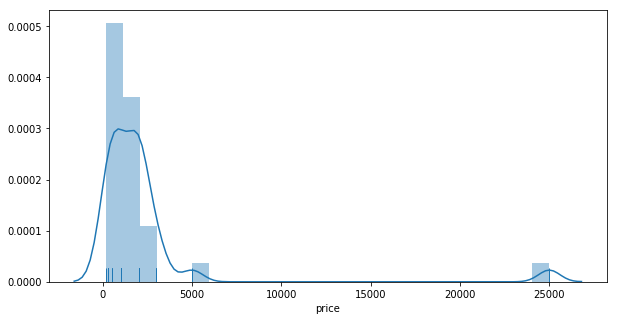

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
fig = sns.distplot(df['매물가(보증금)'], rug=True, axlabel='price', norm_hist=True)
plt.show(fig)
plt.clf()

<Figure size 432x288 with 0 Axes>

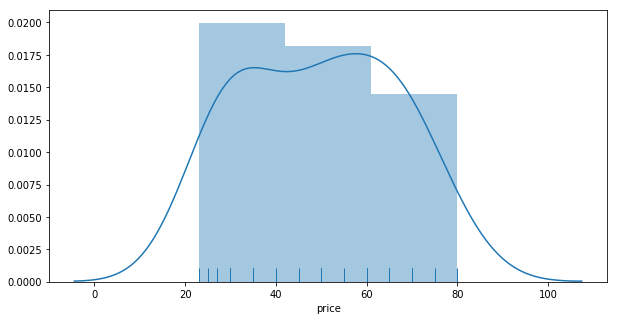

In [16]:
plt.figure(figsize=(10, 5))
fig = sns.distplot(df['매물가(월세)'], rug=True, axlabel='price')
plt.show(fig)
plt.clf()

## 여러 페이지 크롤링

아직 객체에 대해서 다루지 않았어요! 본 예제는 참고로만 확인해보세요

### 모듈화

In [10]:
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
from pandas import DataFrame

class Crawler:
    def __init__(self):
        self.pattern = re.compile(r'\s+')
        self.columns = ['거래', '종류', '확인일자', '매물명', '면적(㎡)', '층', '매물가(보증금)', '매물가(월세)', '연락처']
        self.rows = []
    
    def _make_rows(self, url):
        page = urlopen(url)
        soup = BeautifulSoup(page, 'html.parser')
        tbody = soup.select('.sale_list > tbody > tr')
        for i, tr in enumerate(tbody):
            if i%2 != 0: # 예외 로우 제거
                continue
            # 섬네일 이미지가 포함되지 않은 row
            if len(tr.select('td')) == 8:
                row = []
                for i, td in enumerate(tr.select('td')):
                    if i == 6: # 매물가 int형으로 변경
                        try:
                            price = td.text.replace(',', '')
                            for p in price.split('/'):
                                row.append(int(p))
                        except:
                            row.append(None)
                    else:
                        row.append(re.sub(self.pattern,'', td.text))
            # 섬네일 이미지가 포함된 row
            else:
                row = []
                for i, td in enumerate(tr.select('td')):
                    if i == 6:
                        continue
                    if i == 7: # 매물가 int형으로 변경
                        try:
                            price = td.text.replace(',', '')
                            for p in price.split('/'):
                                row.append(int(p))
                        except:
                            row.append(None)
                    else:
                        row.append(re.sub(self.pattern,'', td.text))
                        
            self.rows.append(row)
            
    def crawling(self, pages=2):
        # 테이블 로우
        for page in range(1, pages):
            self._make_rows('https://land.naver.com/article/divisionInfo.nhn?rletTypeCd=A01&tradeTypeCd=B2&hscpTypeCd=A01%3AA03%3AA04&cortarNo=4211000000&articleOrderCode=&cpId=&minPrc=&maxPrc=&minWrrnt=&maxWrrnt=&minLease=&maxLease=&minSpc=&maxSpc=&subDist=&mviDate=&hsehCnt=&rltrId=&mnex=&siteOrderCode=&cmplYn=&page={}&location=2339#_content_list_target'.format(page))
        df = DataFrame.from_records(self.rows, columns=self.columns)
        return df

In [11]:
crawler = Crawler()
dataset = crawler.crawling(10)

In [12]:
print("데이터 크기: {}".format(len(dataset)))
dataset.head(5)

데이터 크기: 183


,거래,종류,확인일자,매물명,면적(㎡),층,매물가(보증금),매물가(월세),연락처
0,월세,아파트,18.09.19.,집주인동보네이버부동산에서보기,47/28공급면적47㎡전용면적28.38㎡,10/12,300.0,27.0,선율공인중개사사무소033-262-4888
1,월세,아파트,18.09.29.,보배온의네이버부동산에서보기,147/126공급면적147.81㎡전용면적126.57㎡,6/13,2000.0,70.0,부동산에버빌공인중개사사무소010-9477-2598
2,월세,아파트,18.09.28.,퇴계주공1단지네이버부동산에서보기,75/49공급면적75.83㎡전용면적49.71㎡,1/15,3000.0,35.0,춘천LH공인중개사사무소033-264-2003
3,월세,아파트,18.09.28.,진흥네이버부동산에서보기,76/59공급면적76.87㎡전용면적59.15㎡,12/15,1000.0,50.0,그랜드부동산공인중개사사무소033-264-4289
4,월세,아파트,18.09.28.,장학LH해온채네이버부동산에서보기,111B/84공급면적111.81㎡전용면적84.97㎡,2/15,2000.0,65.0,장학부동산공인중개사사무소033-243-4980


### None값 제거

In [13]:
dataset = dataset.dropna()
print("데이터 크기: {}".format(len(dataset)))

데이터 크기: 173


In [14]:
# 매물명의 '네이버부동산에서보기' 제거
dataset['매물명'] = dataset['매물명'].apply(lambda x:x.replace('네이버부동산에서보기', ''))
dataset.head(5)

,거래,종류,확인일자,매물명,면적(㎡),층,매물가(보증금),매물가(월세),연락처
0,월세,아파트,18.09.19.,집주인동보,47/28공급면적47㎡전용면적28.38㎡,10/12,300.0,27.0,선율공인중개사사무소033-262-4888
1,월세,아파트,18.09.29.,보배온의,147/126공급면적147.81㎡전용면적126.57㎡,6/13,2000.0,70.0,부동산에버빌공인중개사사무소010-9477-2598
2,월세,아파트,18.09.28.,퇴계주공1단지,75/49공급면적75.83㎡전용면적49.71㎡,1/15,3000.0,35.0,춘천LH공인중개사사무소033-264-2003
3,월세,아파트,18.09.28.,진흥,76/59공급면적76.87㎡전용면적59.15㎡,12/15,1000.0,50.0,그랜드부동산공인중개사사무소033-264-4289
4,월세,아파트,18.09.28.,장학LH해온채,111B/84공급면적111.81㎡전용면적84.97㎡,2/15,2000.0,65.0,장학부동산공인중개사사무소033-243-4980


### 시각화

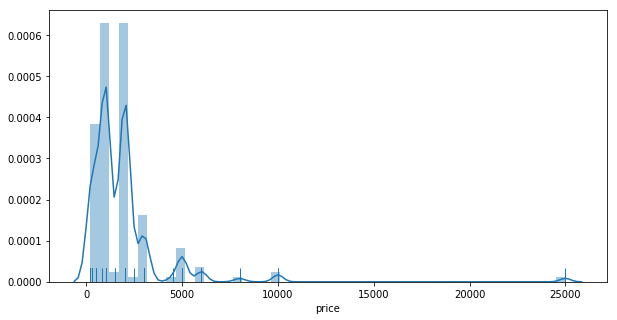

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
fig = sns.distplot(dataset['매물가(보증금)'], rug=True, axlabel='price', norm_hist=True)
plt.show(fig)
plt.clf()

<Figure size 432x288 with 0 Axes>

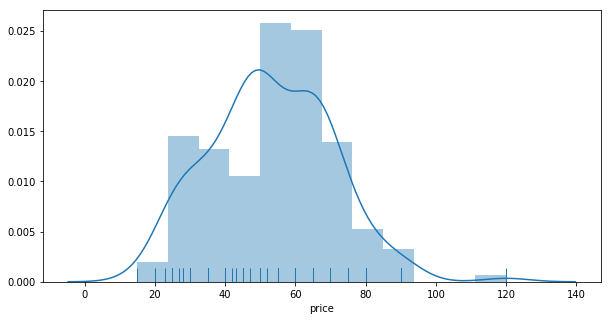

In [16]:
plt.figure(figsize=(10, 5))
fig = sns.distplot(dataset['매물가(월세)'], rug=True, axlabel='price')
plt.show(fig)
plt.clf()

***
### 예제

자유롭게 웹페이지를 정하고 크롤링을 통해 데이터를 확보하여 시각화를 진행해보세요

***